# Dijkstra's Algorithm
- Finds the shortest path from a source node to all other nodes
 - Can be stopped early if you only care about 1 other node

In [ ]:
import heapq

def dijkstras(matrix):
    num_nodes = len(matrix)
    

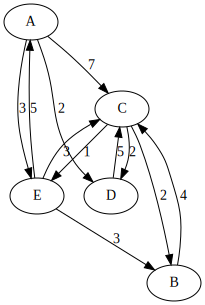

In [12]:
import graphviz

graph1 = graphviz.Digraph('Graph 1')
for c in "ABCDE":
    graph1.node(c)

graph1.edge('A', 'C', label='7')
graph1.edge('C', 'E', label='1')
graph1.edge('E', 'B', label='3')
graph1.edge('E', 'A', label='5')
graph1.edge('A', 'D', label='2')
graph1.edge('C', 'B', label='2')
graph1.edge('B', 'C', label='4')
graph1.edge('E', 'C', label='3')
graph1.edge('A', 'E', label='3')
graph1.edge('D', 'C', label='5')
graph1.edge('C', 'D', label='2')
matrix1 = [
    [0,0,7,2,3],
    [0,0,4,0,0],
    [0,2,0,2,1],
    [0,0,5,0,0],
    [5,3,3,0,0]
]
graph1
